**In this project, how we can add a watermark to an image. Adding a watermark works as copyright for your image, so that no one can illegally use your image  or document. We will use OpenCV for this project to add logo and text as watermark.**

In [5]:
# Important library imports
import cv2
import numpy as np
import requests
from PIL import Image

**We will start by importing required libraries like OpenCV for image processing,numpy for mathematical computation, etc.**

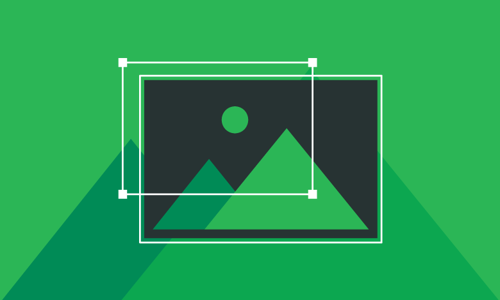

In [8]:
# Reading Image from url
import io
# Fetch the image from the URL and store the response.
response = requests.get('https://media.sproutsocial.com/uploads/2017/02/10x-featured-social-media-image-size.png')
# Use io.BytesIO to wrap the content of the response and open it with PIL.Image.
image = Image.open(io.BytesIO(response.content))
image_logow = image.resize((500, 300))
image_textw = image.resize((500, 300))
image_logow

**For this project we need an image url on which we will apply watermark. We will load the image using the url of the image from google images. You can use any image that you desire and replace the url of image with current url. Next we will read and resize the image and finally store it into two variables for logo and text watermarking.**

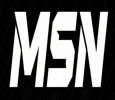

In [24]:
# Reading logo from url
import io
logo_response = requests.get('https://i.ibb.co/x8Lns9LK/unwatermarked-Gemini-Generated-Image-icblr3icblr3icbl.png')
logo = Image.open(io.BytesIO(logo_response.content))
logo = logo.resize((115, 100))
logo

**For logo we are using MSN logo which is downloaded using the above url.**

In [31]:

from PIL import Image
import numpy as np

if isinstance(image_logow, np.ndarray):
    image_logow = Image.fromarray(image_logow)

if isinstance(logo, np.ndarray):
    logo = Image.fromarray(logo)

# Convert PIL -> RGB -> NumPy
image_logow = np.array(image_logow.convert("RGB"))
logo = np.array(logo.convert("RGB"))

# Get shapes
h_image, w_image, _ = image_logow.shape
h_logo, w_logo, _ = logo.shape


**In order to use these images we will first convert them into rgb format and store it as a numpy array. Similiarly , we will also extract the shape i.e. it's height and width.**

In [34]:
# Get the center of the original. It's the location where we will place the watermark

center_y = int(h_image / 2)
center_x = int(w_image / 2)
top_y = center_y - int(h_logo / 2)
left_x = center_x - int(w_logo / 2)
bottom_y = top_y + h_logo
right_x = left_x + w_logo

**We will place our watermark in the center of the image so for that we need to calculate the center of the image. Here, we will find out the center coordinates of the image using height and width of the image.**

In [39]:
# Get Roi (region of interest)
roi = image_logow[top_y: bottom_y, left_x: right_x]
# Add the Logo to the Roi
result = cv2.addWeighted(roi, 1, logo, 1, 0)
# Drawing
cv2.line(image_logow, (0, center_y), (left_x, center_y), (0, 0, 255), 1)
cv2.line(image_logow, (right_x, center_y), (w_image, center_y), (0, 0, 255), 1)
# Replace the ROI on the image
image_logow[top_y: bottom_y, left_x: right_x] = result

**A Region of interest defined as the area we need to place our watermark on. Here, we will find out Roi using the coordinates we found above. Next we will use the OpenCV to merge our logo on ROI. Similiarly we will also add a line or a pattern on our image.**

/tmp/ipython-input-2361536059.py:1: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(image_logow, 'RGB')


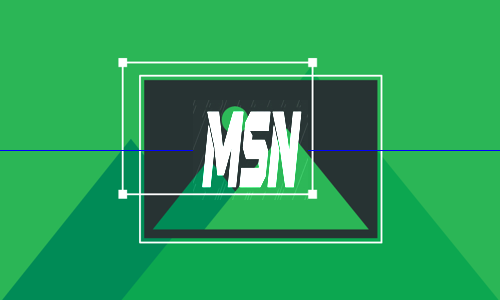

In [40]:
img = Image.fromarray(image_logow, 'RGB')
img

**Now we will convert the image from array to RGB and visualize it.**

In [41]:
# Text Watermark
image_text = np.array(image_textw.convert('RGB'))
cv2.putText(image_text, text='MSN', org=(w_image - 95, h_image - 10), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.5, color=(0,0,255), thickness=2, lineType=cv2.LINE_4);

**Next we shall see how we can use a text as watermark. We will convert our image into RGB and save it as a numpy array. To put a text as a watermark we will be using putText() function of OpenCV. Here we can use diffrent features like seize of the text, thickness of the text, font family,etc.**

/tmp/ipython-input-692905627.py:2: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  timg = Image.fromarray(image_text, 'RGB')


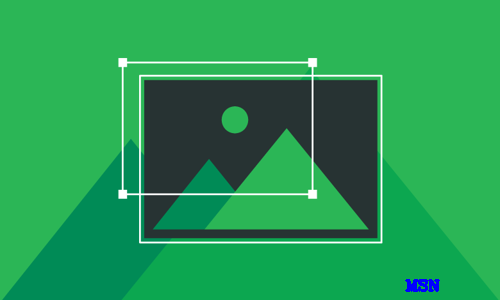

In [42]:
# Plotting text watermark image
timg = Image.fromarray(image_text, 'RGB')
timg

**To visualize the image we need to convert it back to RGB format**


# Conclusion:

**Adding a watermark to an image works as a copyright. Diffrent organizations can use it to make their content secure so that their content cannot be misused without thier license or paid version. In this project we saw how easily we can use OpenCV to add watermarks to our images.**